## Assignment 15

# 1- Business Problem

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pydotplus

In [3]:
df = pd.read_csv(r"C:\Users\Swapnil\Downloads\Company_Data (1).csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df1 = df.copy()

In [5]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Outlier Check

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


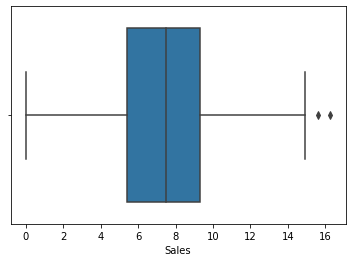

In [7]:
ax = sns.boxplot(df1['Sales'])
plt.show()

### The data has 2 outlier instances

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


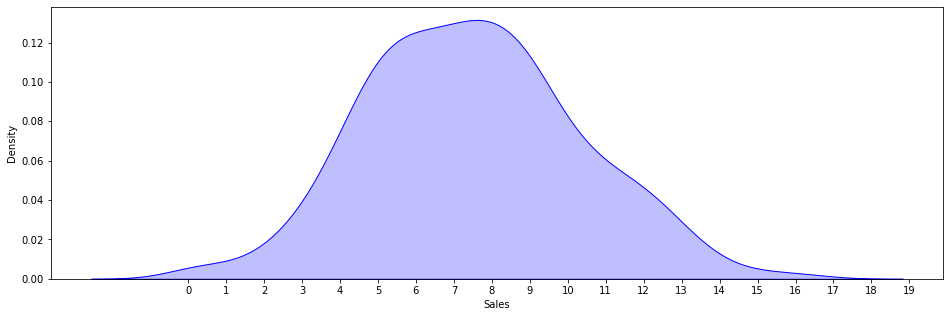

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skwed on the right
### The data has negative Kurtosis

In [11]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

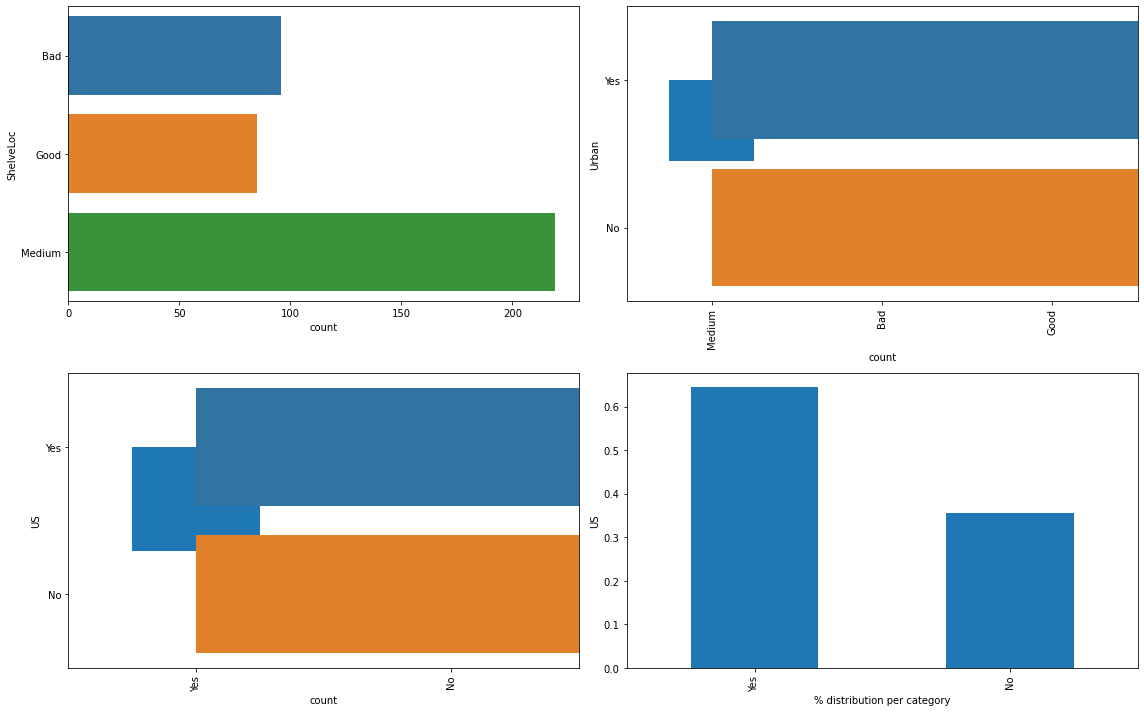

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [13]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

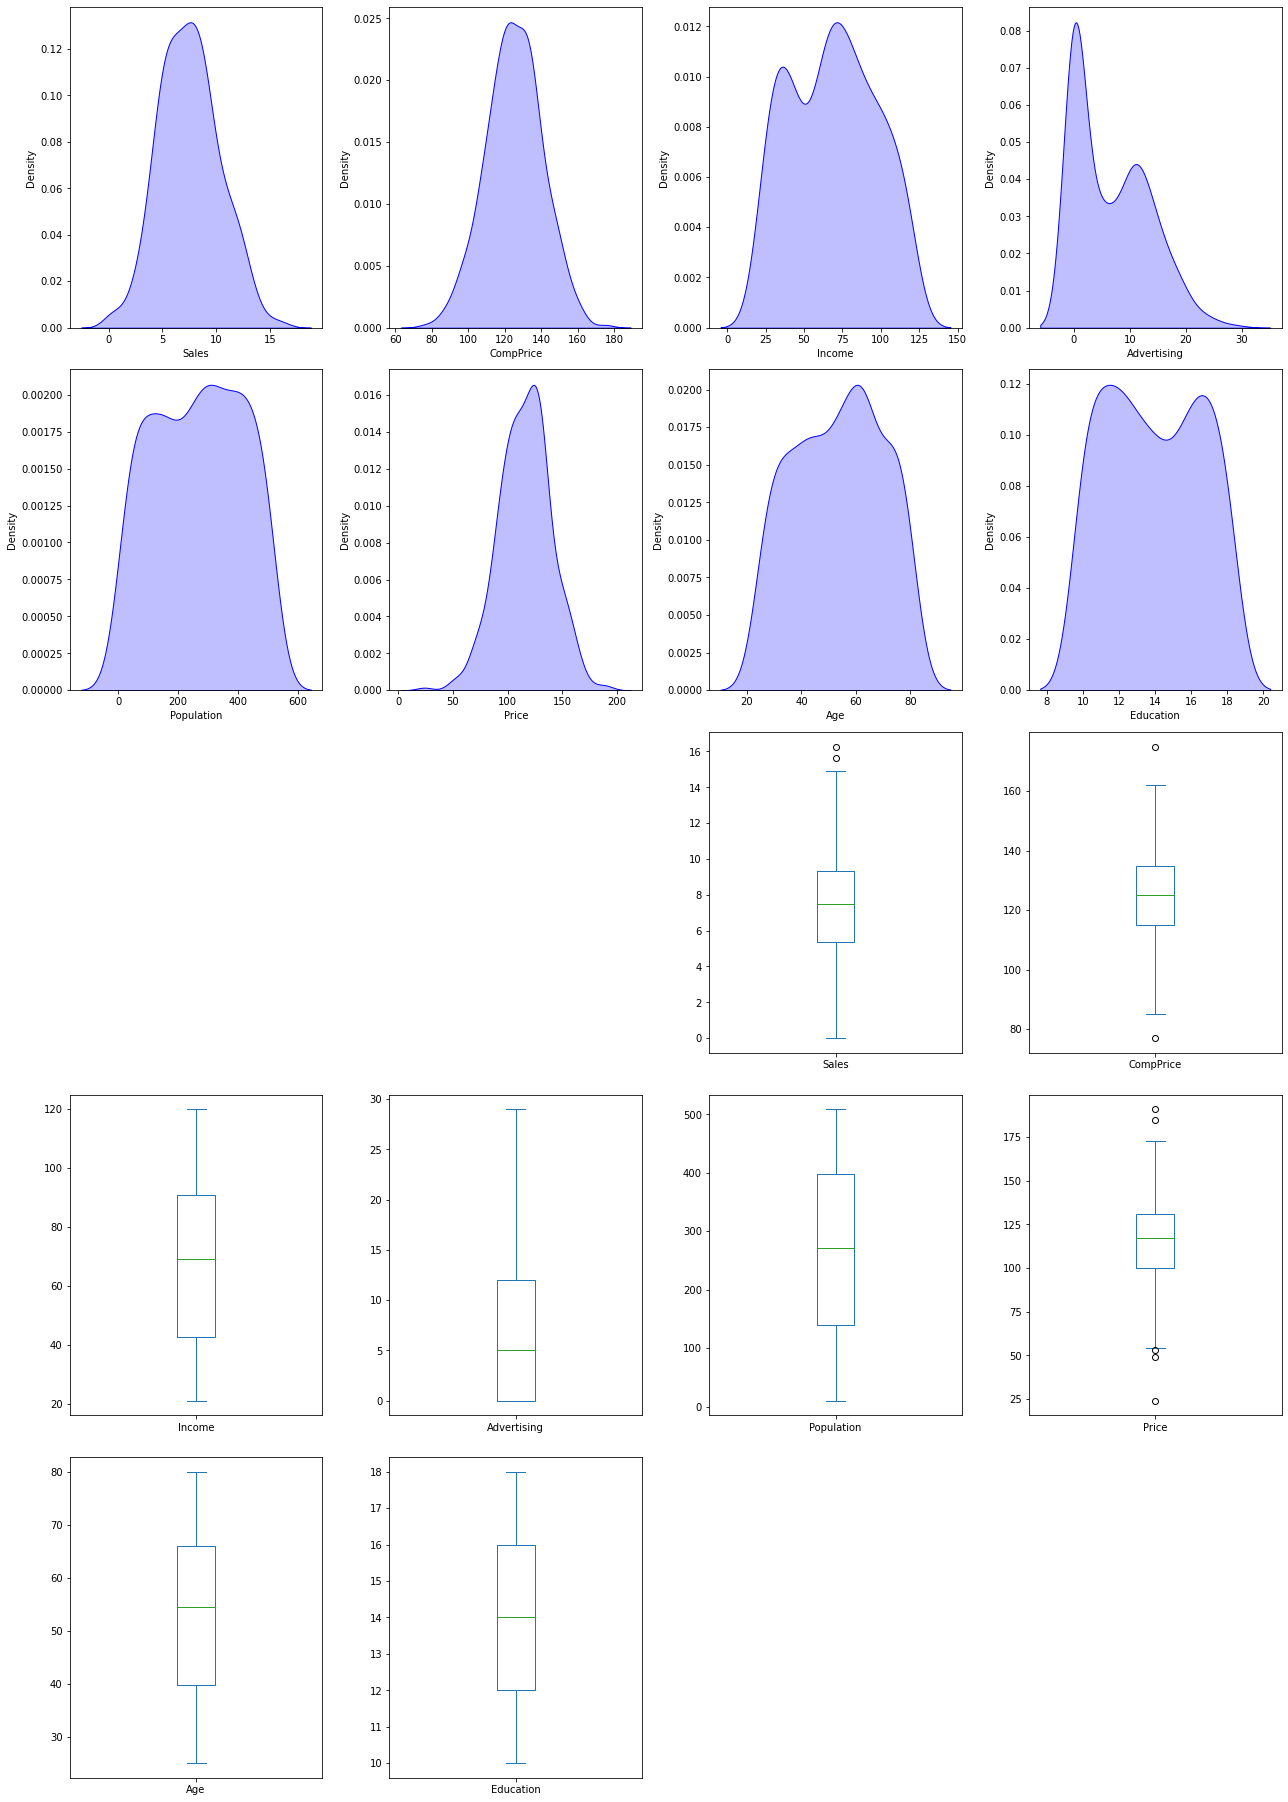

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


In [15]:
corr = df1.corr()

In [16]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])


In [17]:
corr = df1.corr()

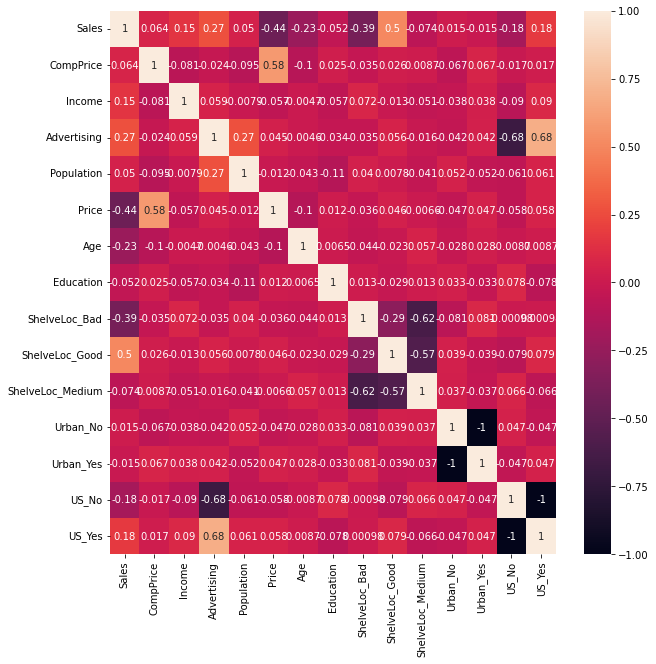

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

## Random Forest Model
### Since the target variable is continious, we create a class of the value based on the mean
### <= 7.49 == "Small" and > 7.49 == "large"

In [19]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [20]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [22]:
y_train.value_counts()


small    166
large    154
Name: sales, dtype: int64

In [23]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.83125

In [24]:
pred_train = model.predict(x_train)

In [25]:
accuracy_score(y_train,pred_train)

1.0

In [26]:
confusion_matrix(y_train,pred_train)

array([[154,   0],
       [  0, 166]], dtype=int64)

In [27]:
pred_test = model.predict(x_test)

In [28]:
accuracy_score(y_test,pred_test)

0.7375

In [29]:
confusion_matrix(y_test,pred_test)

array([[33, 12],
       [ 9, 26]], dtype=int64)

In [30]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [31]:
df_t.head()

,Actual,Predicted
32,small,large
195,small,small
25,large,large
94,large,small
304,large,large


In [32]:
cols = list(df1.columns)

In [33]:
predictors = cols[0:14]
target = cols[14]

In [34]:
tree1 = model.estimators_[20]

In [35]:
dot_data = StringIO()

In [36]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#  Conclusion
### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
### As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [38]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [39]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [40]:
tree_small = rf_small.estimators_[5]

In [41]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [42]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [43]:
model.feature_importances_

array([0.12789412, 0.08739709, 0.09694969, 0.08900842, 0.22097624,
       0.11434179, 0.05909664, 0.04325986, 0.0832023 , 0.02632448,
       0.01076843, 0.01204725, 0.0153828 , 0.0133509 ])

In [44]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [45]:
fi

,feature,importance
4,Price,0.220976
0,CompPrice,0.127894
5,Age,0.114342
2,Advertising,0.096950
3,Population,0.089008
1,Income,0.087397
8,ShelveLoc_Good,0.083202
6,Education,0.059097
7,ShelveLoc_Bad,0.043260
9,ShelveLoc_Medium,0.026324


### As seen in the above table Price is most important feature

# 2- Data collection and Description

### Problem Statement
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [114]:
df2=pd.read_csv(r"C:\Users\Swapnil\Downloads\Fraud_check (1).csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [115]:
df2.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [116]:
df2.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [117]:
df2.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Outlier Check

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


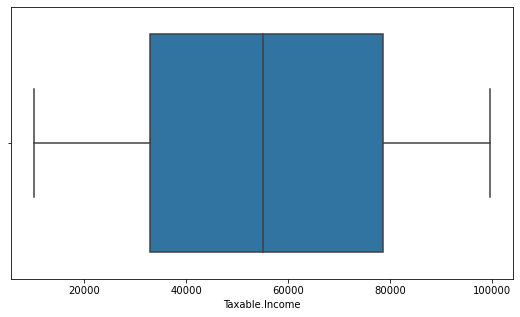

In [118]:
sns.boxplot(df2['Taxable.Income'])
plt.show()

### There are no outliers in the data

In [51]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


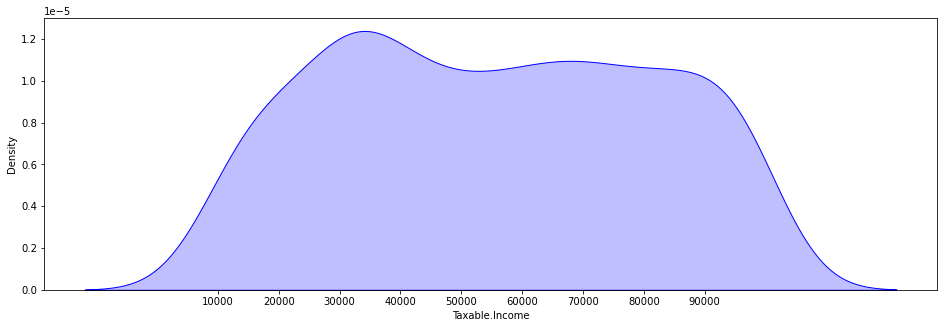

In [119]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df2['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df2['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df2['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

### The data is Skwed on the right
### The data has negative Kurtosis

In [120]:
obj_colum = df2.select_dtypes(include='object').columns.tolist()

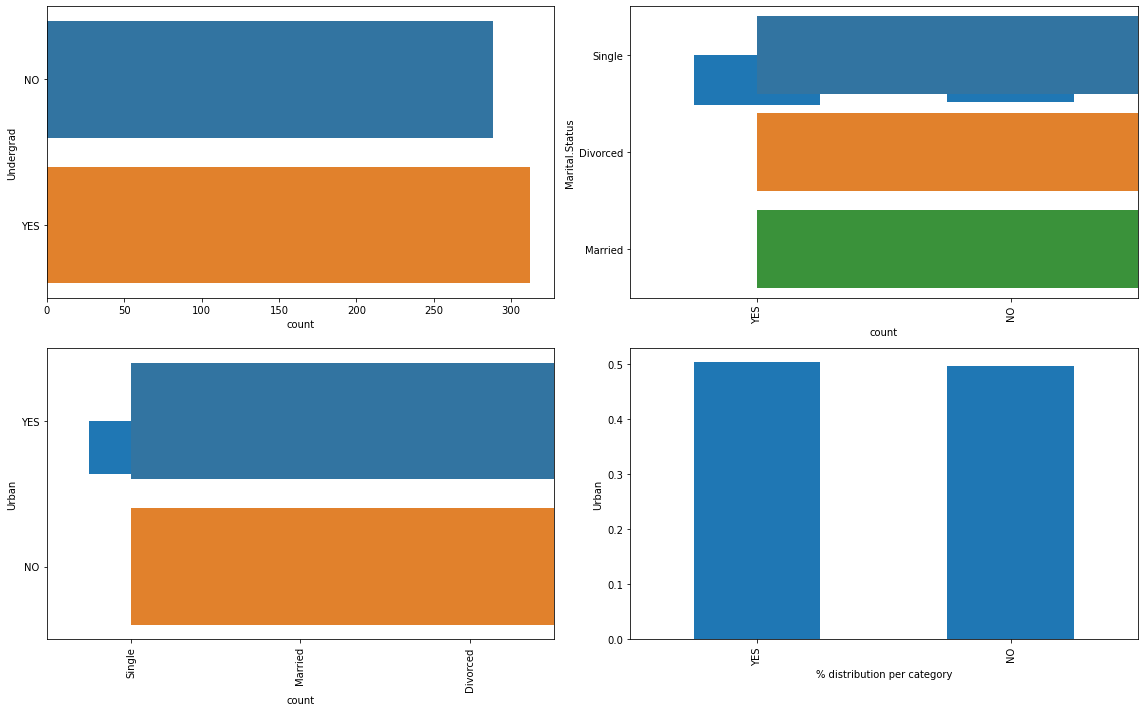

In [121]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

In [122]:
num_columns = df2.select_dtypes(exclude='object').columns.tolist()

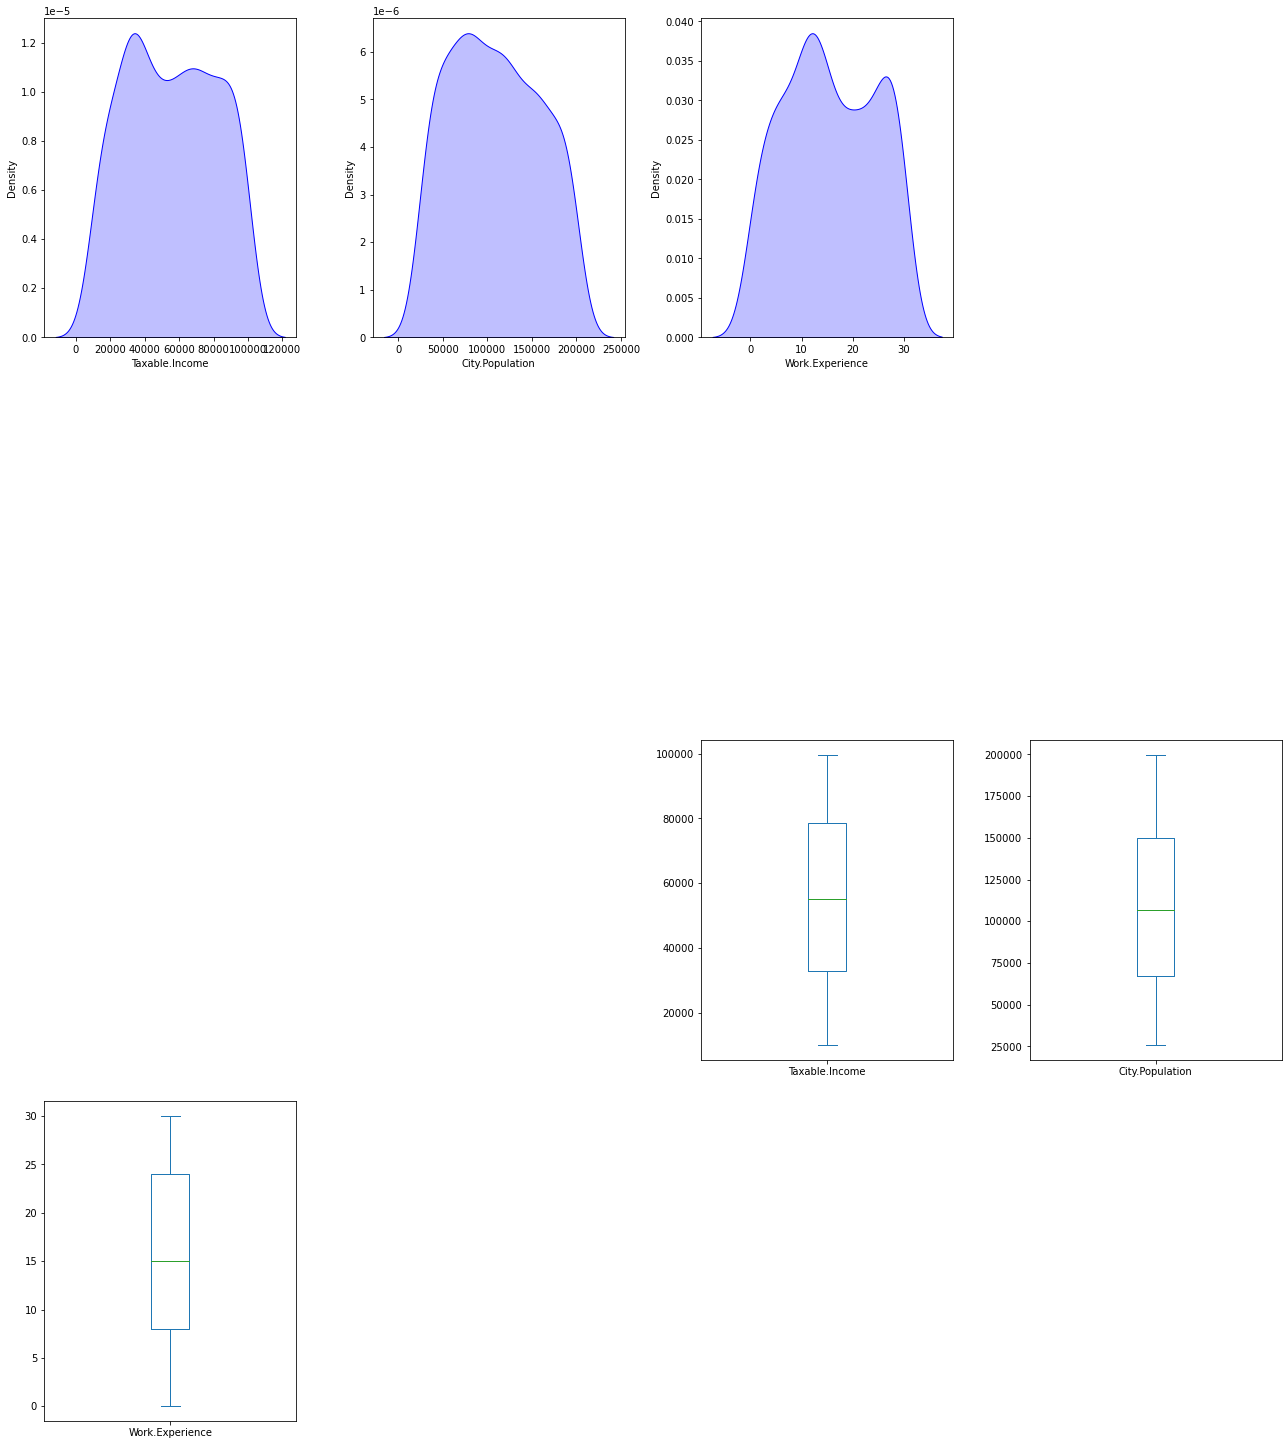

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [123]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [124]:
df2 = pd.get_dummies(df2, columns = ['Undergrad','Marital.Status','Urban'])

In [125]:
corr = df2.corr()

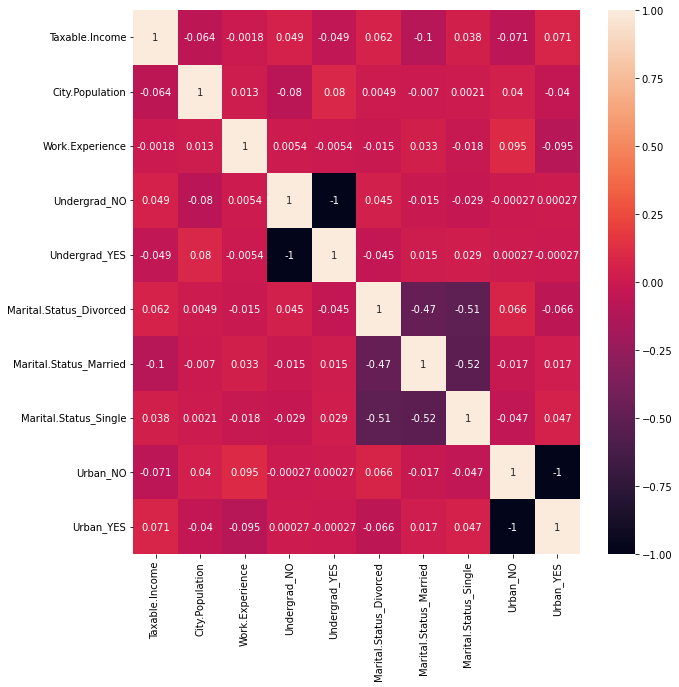

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

### 3. Random Forest Model
### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [127]:
df2['Taxable.Income']=pd.cut(df2['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [128]:
list(df2.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [129]:
X = df2.iloc[:,1:10]
y = df2.iloc[:,0]

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [131]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [132]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7270833333333333

In [133]:
pred_train = model.predict(x_train)

In [134]:
accuracy_score(y_train,pred_train)

1.0

In [135]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [136]:
pred_test = model.predict(x_test)

In [137]:
accuracy_score(y_test,pred_test)

0.7166666666666667

In [138]:
confusion_matrix(y_test,pred_test)

array([[85, 10],
       [24,  1]], dtype=int64)

In [139]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [142]:
df_t

,Actual,Predicted
528,good,risky
473,good,good
362,risky,good
537,good,good
95,good,good
...,...,...
345,good,good
306,good,good
324,good,good
112,good,good


In [143]:
cols = list(df2.columns)

In [144]:
predictors = cols[1:10]
target = cols[0]

In [145]:
tree1 = model.estimators_[20]

In [146]:
dot_data = StringIO()

In [147]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [148]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

## 4. Conclusion
### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%
### As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not

In [149]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [150]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [151]:
tree_small = rf_small.estimators_[5]

In [152]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [153]:
model.feature_importances_

array([0.50754046, 0.36789762, 0.01525497, 0.01582846, 0.0201488 ,
       0.02021801, 0.01838701, 0.01812108, 0.01660359])

In [154]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [155]:
fi

,feature,importance
0,City.Population,0.507540
1,Work.Experience,0.367898
5,Marital.Status_Married,0.020218
4,Marital.Status_Divorced,0.020149
6,Marital.Status_Single,0.018387
7,Urban_NO,0.018121
8,Urban_YES,0.016604
3,Undergrad_YES,0.015828
2,Undergrad_NO,0.015255


# As seen in the above table city population is most important feature